In [1]:
"""Analysis of the greedy results"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "optimal_greedy_test_basic_j12_s2_0",
    # "optimal_greedy_test_basic_j15_s2_0",
    "optimal_greedy_test_basic_j15_s3_0",
    "optimal_greedy_test_basic_j25_s5_0",
    "optimal_greedy_test_basic_j50_s5_0"
]

big_small = [
    "optimal_greedy_test_big_small_j12_s2_0",
    # "optimal_greedy_test_big_small_j15_s2_0",
    "optimal_greedy_test_big_small_j15_s3_0",
    "optimal_greedy_test_big_small_j25_s5_0",
    "optimal_greedy_test_big_small_j50_s7_0",
    "optimal_greedy_test_big_small_j75_s8_0",
    "optimal_greedy_test_big_small_j100_s10_0"
]
all_policies = [
    '../all_greedy_test_Fog_j12_s3_0'
]
paper = [
    "flexible_greedy_fog_j15_s3_0",
    "flexible_greedy_fog_j20_s4_0",
    "flexible_greedy_fog_j30_s5_0"
]

In [5]:
encoded_filenames = paper
folder = "paper"
x_axis = 'Sum Value'
title = "{} of {} model".format(x_axis, 'Basic')

In [6]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage jobs from all of the algorithms
            best_sum_value = max(r['sum value'] for a, r in results.items()
                                 if a != 'Relaxed' and type(r) is dict)
            best_percentage_jobs = max(r['percentage jobs'] for a, r in results.items()
                                       if a != 'Relaxed' and type(r) is dict)
            
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage jobs'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage jobs'] / best_percentage_jobs))

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Sum Value', 'Percentage Jobs',
                                 'Solve Time', 'Best Sum Value', 'Best Percentage Jobs'])

In [7]:
df.sort_values(by=['Sum Value'])[['Algorithm Name', 'Sum Value']].tail(50)


,Algorithm Name,Sum Value
13917,"Greedy Utility * deadline / Sum, minimise Job ...",1283
13869,"Greedy Utility * deadline / Sum, maximise Job ...",1284
13870,"Greedy Utility * deadline / Sum, maximise Job ...",1284
13866,"Greedy Utility * deadline / Sum, maximise Job ...",1284
13865,"Greedy Utility * deadline / Sum, maximise Job ...",1284
13868,"Greedy Utility * deadline / Sum, minimise Job ...",1284
13861,"Greedy Utility * deadline / Sum, maximise Sum,...",1284
13862,"Greedy Utility * deadline / Sum, maximise Sum,...",1284
13895,"Greedy Utility / Sum, maximise Job Sum of Perc...",1286
13924,"Greedy Value, minimise Sum, Percentage Sum",1286


In [9]:
df = df.loc[~((df['Algorithm Name'].str.contains('Greedy Utility * deadline / Sum', regex=False)) |
              (df['Algorithm Name'].str.contains('Greedy Utility / Sqrt Sum', regex=False)) |
              (df['Algorithm Name'].str.contains('Matrix Greedy Sum Exp^3 Percentage', regex=False)))]
df['Algorithm Name'].unique()

array(['Optimal', 'Fixed', 'Relaxed',
       'Greedy Utility / Sum, minimise Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Utility * Sum / deadline, minimise Sum, Percentag

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


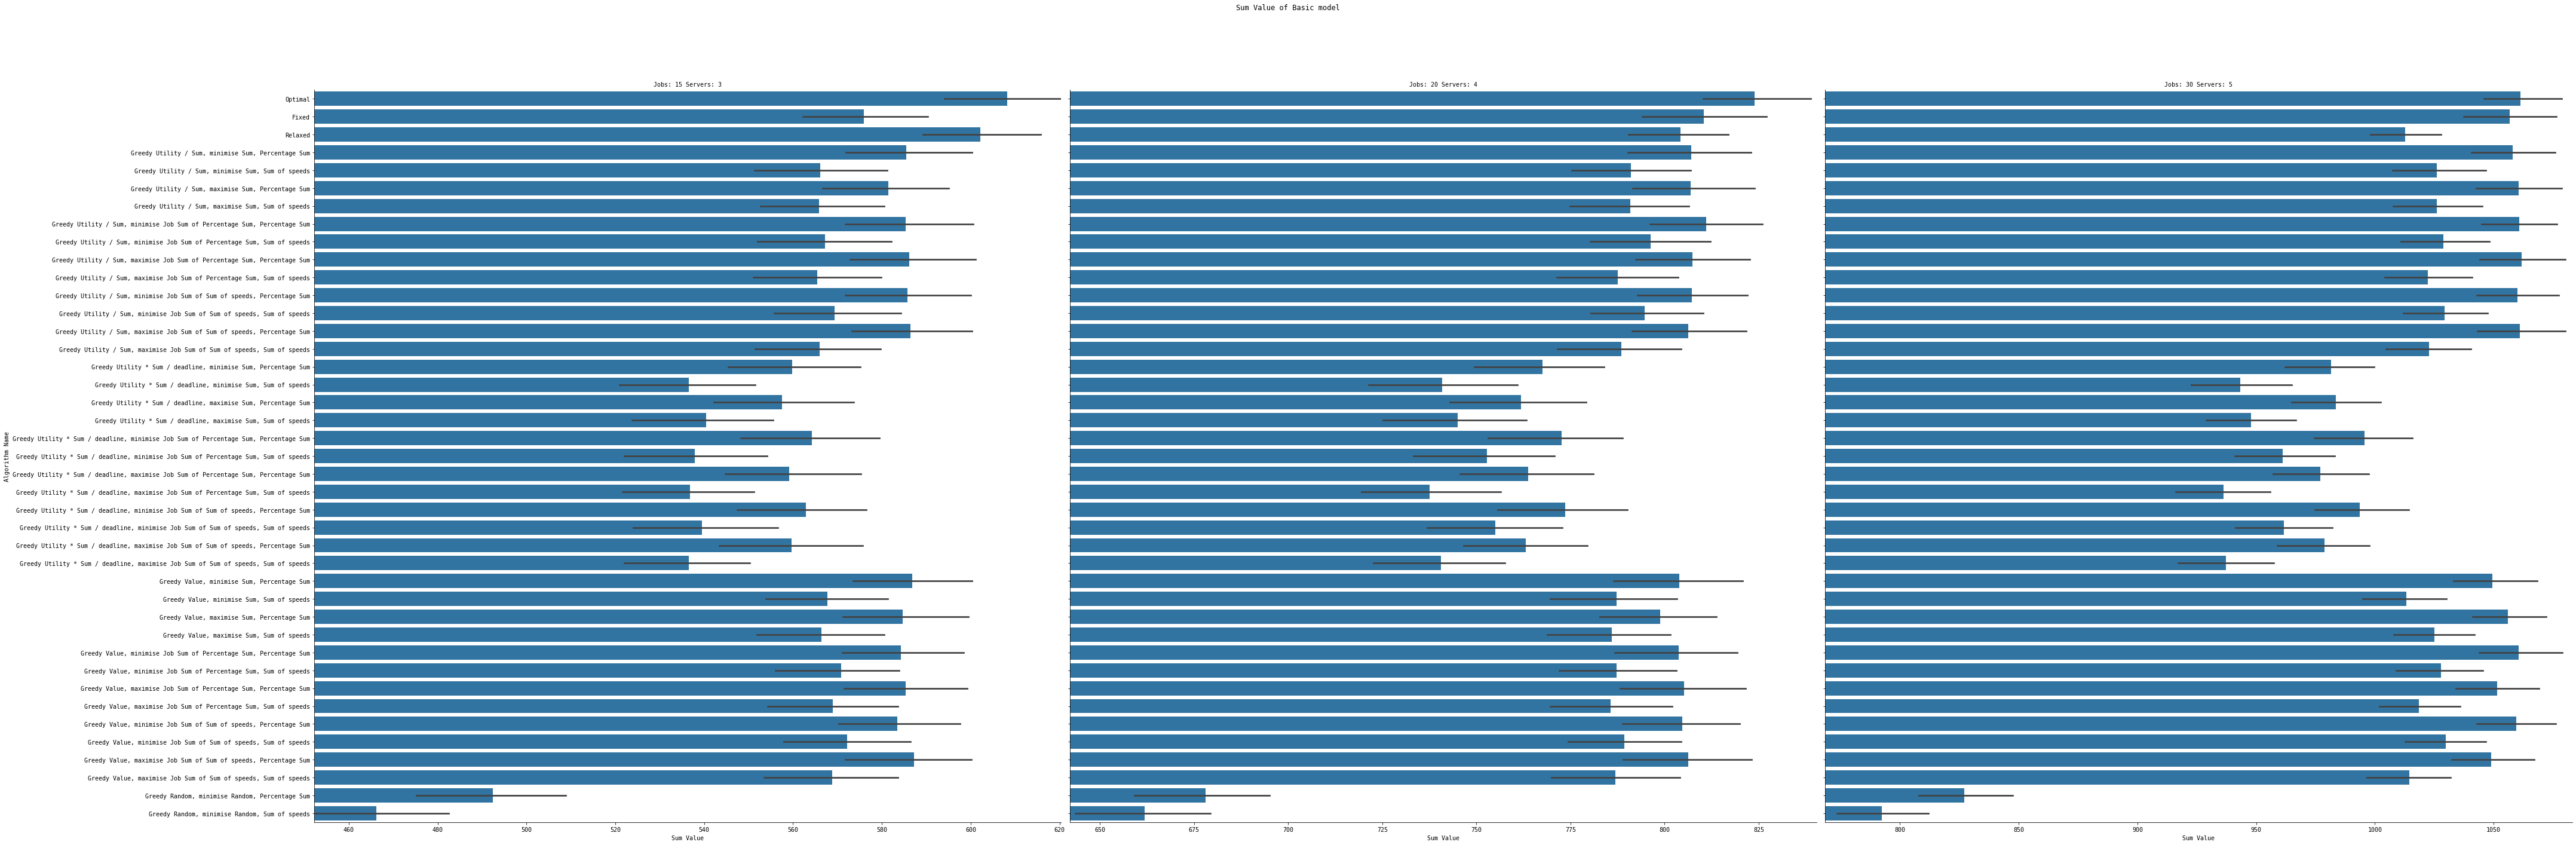

In [10]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=20)
g = g.map(sns.barplot, x_axis, 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model Name'] == model) & (df['Algorithm Name'] == algo)][x_axis])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.97, max(values) * 1.02)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g    

In [11]:
df['Algorithm Name'].unique()

array(['Optimal', 'Fixed', 'Relaxed',
       'Greedy Utility / Sum, minimise Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Utility * Sum / deadline, minimise Sum, Percentag

In [17]:
short_df = df[(df['Algorithm Name'] == 'Optimal') | 
            # (df['Algorithm Name'] == 'Relaxed') | 
              (df['Algorithm Name'] == 'Fixed')   |
              (df['Algorithm Name'] == 'Greedy Utility / Sum, minimise Sum, Percentage Sum')].replace('Greedy Utility / Sum, minimise Sum, Percentage Sum', 'Greedy Algorithm')
short_df

,Pos,Model Name,Algorithm Name,Sum Value,Percentage Jobs,Solve Time,Best Sum Value,Best Percentage Jobs
0,0,Jobs: 15 Servers: 3,Optimal,714,0.733,60.020,1.000000,1.000000
1,0,Jobs: 15 Servers: 3,Fixed,667,0.667,23.400,0.934174,0.909959
2,0,Jobs: 15 Servers: 3,Relaxed,714,0.733,60.038,1.000000,1.000000
3,0,Jobs: 15 Servers: 3,Greedy Algorithm,562,0.533,0.411,0.787115,0.727149
53,1,Jobs: 15 Servers: 3,Optimal,643,0.800,60.020,1.000000,1.000000
...,...,...,...,...,...,...,...,...
15796,98,Jobs: 30 Servers: 5,Greedy Algorithm,1199,0.633,0.956,0.971637,0.949025
15846,99,Jobs: 30 Servers: 5,Optimal,1128,0.600,60.020,0.986877,0.947867
15847,99,Jobs: 30 Servers: 5,Fixed,1136,0.633,60.020,0.993876,1.000000
15848,99,Jobs: 30 Servers: 5,Relaxed,1033,0.567,60.056,0.903762,0.895735


(0.9, 1.055)

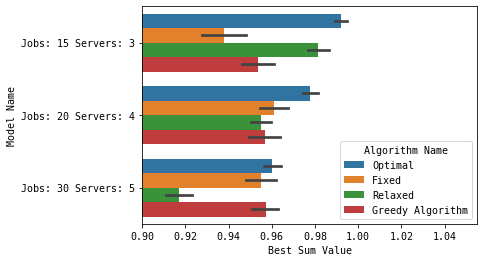

In [18]:
g = sns.barplot(y='Model Name', x='Best Sum Value', hue='Algorithm Name', data=short_df)
g.set_xlim(0.9, 1.055)
# save_plot(analysis_filename('all', 'shortened'), "greedy", image_format=[ImageFormat.PNG, ImageFormat.EPS])
